<a href="https://colab.research.google.com/github/nayumakthar88/Dental-Caries-Detection-from-Dental-X-rays/blob/main/iprml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [8]:
data=pd.read_csv('/content/dental_caries11.csv')

# New Section

In [9]:
data.shape

(52200, 7)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52200 entries, 0 to 52199
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   County                                         52200 non-null  object
 1   Calendar Year                                  52200 non-null  object
 2   Measure                                        52200 non-null  object
 3   Age Filter                                     52200 non-null  object
 4   Users                                          40533 non-null  object
 5   Denominator (3 Months Continuous Eligibility)  51857 non-null  object
 6   Utilization %                                  40319 non-null  object
dtypes: object(7)
memory usage: 2.8+ MB


In [11]:
data.columns

Index(['County', 'Calendar Year', 'Measure', 'Age Filter', 'Users',
       'Denominator (3 Months Continuous Eligibility)', 'Utilization %'],
      dtype='object')

In [12]:
data.isnull()

,County,Calendar Year,Measure,Age Filter,Users,Denominator (3 Months Continuous Eligibility),Utilization %
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
52195,False,False,False,False,False,False,False
52196,False,False,False,False,False,False,False
52197,False,False,False,False,False,False,False
52198,False,False,False,False,False,False,False


In [13]:
data.isnull().sum()

,0
County,0
Calendar Year,0
Measure,0
Age Filter,0
Users,11667
Denominator (3 Months Continuous Eligibility),343
Utilization %,11881


In [14]:
data.dropna()

,County,Calendar Year,Measure,Age Filter,Users,Denominator (3 Months Continuous Eligibility),Utilization %
0,Alameda,CY 2013,Annual Dental Visit (D0100 - D9999 or Safety N...,Age <1,164,"6,878",2.38%
1,Alameda,CY 2013,Annual Dental Visit (D0100 - D9999 or Safety N...,Age 10-14,"16,638","33,609",49.50%
2,Alameda,CY 2013,Annual Dental Visit (D0100 - D9999 or Safety N...,Age 1-2,"4,665","16,442",28.37%
3,Alameda,CY 2013,Annual Dental Visit (D0100 - D9999 or Safety N...,Age 15-18,"10,116","24,864",40.69%
4,Alameda,CY 2013,Annual Dental Visit (D0100 - D9999 or Safety N...,Age 19-20,"2,678","9,457",28.32%
...,...,...,...,...,...,...,...
52195,Yuba,CY 2022,Treatment for Caries (D2000-D2999) or Caries-P...,Age 21-34,"1,007","7,787",12.93%
52196,Yuba,CY 2022,Treatment for Caries (D2000-D2999) or Caries-P...,Age 35-44,505,"4,547",11.11%
52197,Yuba,CY 2022,Treatment for Caries (D2000-D2999) or Caries-P...,Age 45-64,744,"6,982",10.66%
52198,Yuba,CY 2022,Treatment for Caries (D2000-D2999) or Caries-P...,Age 65-74,217,"2,014",10.77%


In [15]:
data.dropna(how='any')

,County,Calendar Year,Measure,Age Filter,Users,Denominator (3 Months Continuous Eligibility),Utilization %
0,Alameda,CY 2013,Annual Dental Visit (D0100 - D9999 or Safety N...,Age <1,164,"6,878",2.38%
1,Alameda,CY 2013,Annual Dental Visit (D0100 - D9999 or Safety N...,Age 10-14,"16,638","33,609",49.50%
2,Alameda,CY 2013,Annual Dental Visit (D0100 - D9999 or Safety N...,Age 1-2,"4,665","16,442",28.37%
3,Alameda,CY 2013,Annual Dental Visit (D0100 - D9999 or Safety N...,Age 15-18,"10,116","24,864",40.69%
4,Alameda,CY 2013,Annual Dental Visit (D0100 - D9999 or Safety N...,Age 19-20,"2,678","9,457",28.32%
...,...,...,...,...,...,...,...
52195,Yuba,CY 2022,Treatment for Caries (D2000-D2999) or Caries-P...,Age 21-34,"1,007","7,787",12.93%
52196,Yuba,CY 2022,Treatment for Caries (D2000-D2999) or Caries-P...,Age 35-44,505,"4,547",11.11%
52197,Yuba,CY 2022,Treatment for Caries (D2000-D2999) or Caries-P...,Age 45-64,744,"6,982",10.66%
52198,Yuba,CY 2022,Treatment for Caries (D2000-D2999) or Caries-P...,Age 65-74,217,"2,014",10.77%


In [16]:
data.dropna(how='all')

,County,Calendar Year,Measure,Age Filter,Users,Denominator (3 Months Continuous Eligibility),Utilization %
0,Alameda,CY 2013,Annual Dental Visit (D0100 - D9999 or Safety N...,Age <1,164,"6,878",2.38%
1,Alameda,CY 2013,Annual Dental Visit (D0100 - D9999 or Safety N...,Age 10-14,"16,638","33,609",49.50%
2,Alameda,CY 2013,Annual Dental Visit (D0100 - D9999 or Safety N...,Age 1-2,"4,665","16,442",28.37%
3,Alameda,CY 2013,Annual Dental Visit (D0100 - D9999 or Safety N...,Age 15-18,"10,116","24,864",40.69%
4,Alameda,CY 2013,Annual Dental Visit (D0100 - D9999 or Safety N...,Age 19-20,"2,678","9,457",28.32%
...,...,...,...,...,...,...,...
52195,Yuba,CY 2022,Treatment for Caries (D2000-D2999) or Caries-P...,Age 21-34,"1,007","7,787",12.93%
52196,Yuba,CY 2022,Treatment for Caries (D2000-D2999) or Caries-P...,Age 35-44,505,"4,547",11.11%
52197,Yuba,CY 2022,Treatment for Caries (D2000-D2999) or Caries-P...,Age 45-64,744,"6,982",10.66%
52198,Yuba,CY 2022,Treatment for Caries (D2000-D2999) or Caries-P...,Age 65-74,217,"2,014",10.77%


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
data = data.dropna()
x = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/dental_caries11.csv')
print(data.shape)
data = data.dropna(how='all', subset=data.columns[[2, 3, 4]])
print(data.shape)
x = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values


(52200, 7)
(52200, 7)


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('/content/dental_caries11.csv')
print(data.info())
print(data.columns)
data['Denominator (3 Months Continuous Eligibility)'] = pd.to_numeric(data['Denominator (3 Months Continuous Eligibility)'].str.replace(',', ''), errors='coerce')
data['Utilization %'] = pd.to_numeric(data['Utilization %'].str.replace(',', ''), errors='coerce')
data['Users'] = pd.to_numeric(data['Users'].str.replace(',', ''), errors='coerce')
for col in ['Users', 'Denominator (3 Months Continuous Eligibility)', 'Utilization %']:
    mean_val = pd.to_numeric(data[col], errors='coerce').mean()
    data[col] = data[col].fillna(mean_val)
numerical_cols = ['Denominator (3 Months Continuous Eligibility)', 'Utilization %']  # Explicitly specify columns
x = data[numerical_cols].values
y = data['Users'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(f"Training Set (x_train):\n{x_train}")
print(f"Test Set (x_test):\n{x_test}")
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52200 entries, 0 to 52199
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   County                                         52200 non-null  object
 1   Calendar Year                                  52200 non-null  object
 2   Measure                                        52200 non-null  object
 3   Age Filter                                     52200 non-null  object
 4   Users                                          40533 non-null  object
 5   Denominator (3 Months Continuous Eligibility)  51857 non-null  object
 6   Utilization %                                  40319 non-null  object
dtypes: object(7)
memory usage: 2.8+ MB
None
Index(['County', 'Calendar Year', 'Measure', 'Age Filter', 'Users',
       'Denominator (3 Months Continuous Eligibility)', 'Utilization %'],
      dtype='object')
Training

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [23]:
import pandas as pd
data_set = pd.read_csv('/content/dental_caries11.csv')
x = data_set.iloc[:, [2, 3]].values
y = data_set.iloc[:, 4].values

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(f"Training Set (x_train):\n{x_train}")
print(f"Test Set (x_test):\n{x_test}")

Training Set (x_train):
[['Exams/Oral Health Evaluations (D0120, D0145, or D0150)' 'Age 15-18']
 ['Use of Sealant (D1351 or Safety Net Clinics 03 Encounters with ICD 10 Code Z98810)'
  'Age 45-64']
 ['Use of Sealant (D1351 or Safety Net Clinics 03 Encounters with ICD 10 Code Z98810)'
  'Age 10-14']
 ...
 ['Treatment for Caries (D2000-D2999) or Caries-Preventive Procedure (D1203-D1208, D1310, D1330, D1351 or Safety Net Clinics 03 Encounters with identified ICD 10 Codes)'
  'Age 1-2']
 ['Annual Dental Visit (D0100 - D9999, CPT 99188 or Safety Net Clinics 03 Encounters)'
  'Age 21-34']
 ['Use of Preventive Services (D1000 - D1999)' 'Age 45-64']]
Test Set (x_test):
[['Annual Dental Visit (D0100 - D9999 or Safety Net Clinics 03 Encounters)'
  'Age <1']
 ['Use of Dental Treatment Services (D2000 - D9999)' 'Age 45-64']
 ['Exams/Oral Health Evaluations (D0120, D0145, or D0150 or Safety Net Clinics 03 Encounters with identified ICD 10 Codes)'
  'Age <1']
 ...
 ['Use of Preventive Services (D100

In [25]:
import pandas as pd
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
csv_file_path = '/content/dental_caries11.csv'
df = pd.read_csv(csv_file_path)
df['Users'] = df['Users'].replace('nan', np.nan)
def convert_to_numeric(x):
    try:
        return int(x.replace(',', ''))
    except (ValueError, TypeError):
        return np.nan
df["Users"] = df["Users"].astype(str).apply(convert_to_numeric)
df = df.dropna(subset=['Users'])
y_true = np.array(df["Users"].tolist())
np.random.seed(42)
y_pred = np.random.randint(0, 2, size=y_true.shape)
conf_matrices = multilabel_confusion_matrix(y_true, y_pred)
label_names = ["Denominator (3 Months Continuous Eligibility)", "Utilization %", "Users"]
conf_matrices_dict = {label: conf_matrices[i] for i, label in enumerate(label_names)}
for label, matrix in conf_matrices_dict.items():
    print(f"Confusion Matrix for {label}:")
    print(matrix)
    print()

Confusion Matrix for Denominator (3 Months Continuous Eligibility):
[[19350 19331]
 [  948   904]]

Confusion Matrix for Utilization %:
[[20235 20298]
 [    0     0]]

Confusion Matrix for Users:
[[40381     0]
 [  152     0]]



In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
data = pd.read_csv('/content/dental_caries11.csv')
X = data[['Denominator (3 Months Continuous Eligibility)', 'Users']]
y = data['Utilization %']
X['Denominator (3 Months Continuous Eligibility)'] = pd.to_numeric(X['Denominator (3 Months Continuous Eligibility)'].str.replace(',', ''), errors='coerce')
X['Users'] = pd.to_numeric(X['Users'].str.replace(',', ''), errors='coerce')
y = pd.to_numeric(y.str.rstrip('%'), errors='coerce')
X = X.fillna(X.mean())
y = y.fillna(y.mean())
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


/tmp/ipython-input-26-1788411917.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Denominator (3 Months Continuous Eligibility)'] = pd.to_numeric(X['Denominator (3 Months Continuous Eligibility)'].str.replace(',', ''), errors='coerce')
/tmp/ipython-input-26-1788411917.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Users'] = pd.to_numeric(X['Users'].str.replace(',', ''), errors='coerce')


Mean Squared Error: 0.40017244446028927


/tmp/ipython-input-27-518334307.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Filter', y='Users', data=dental_data_sample, palette='viridis')


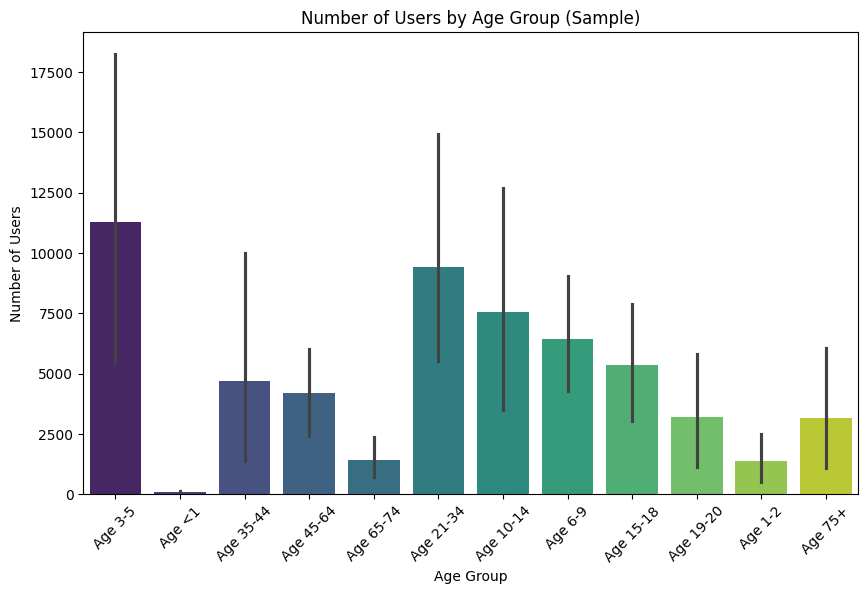

/tmp/ipython-input-27-518334307.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Calendar Year', y='Utilization %', data=dental_data_sample, marker='o', ci=None)


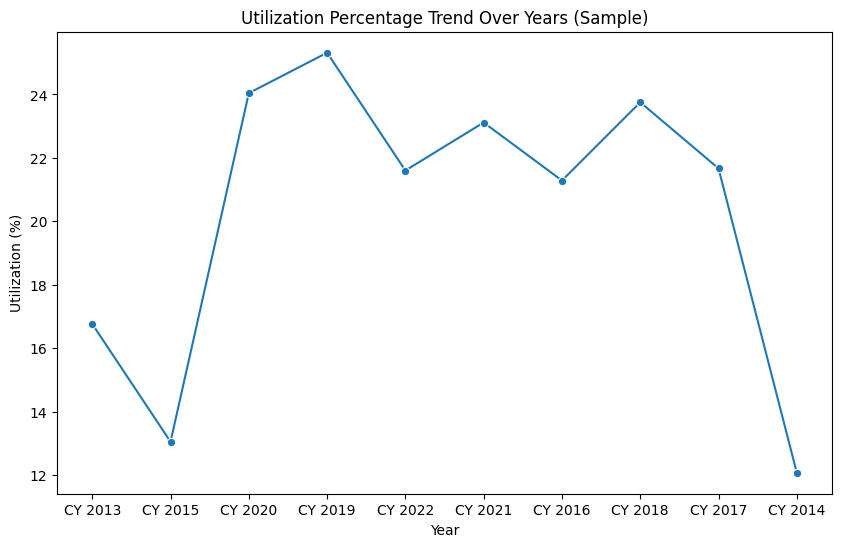

/tmp/ipython-input-27-518334307.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='County', y='Users', data=dental_data_sample, palette='pastel')


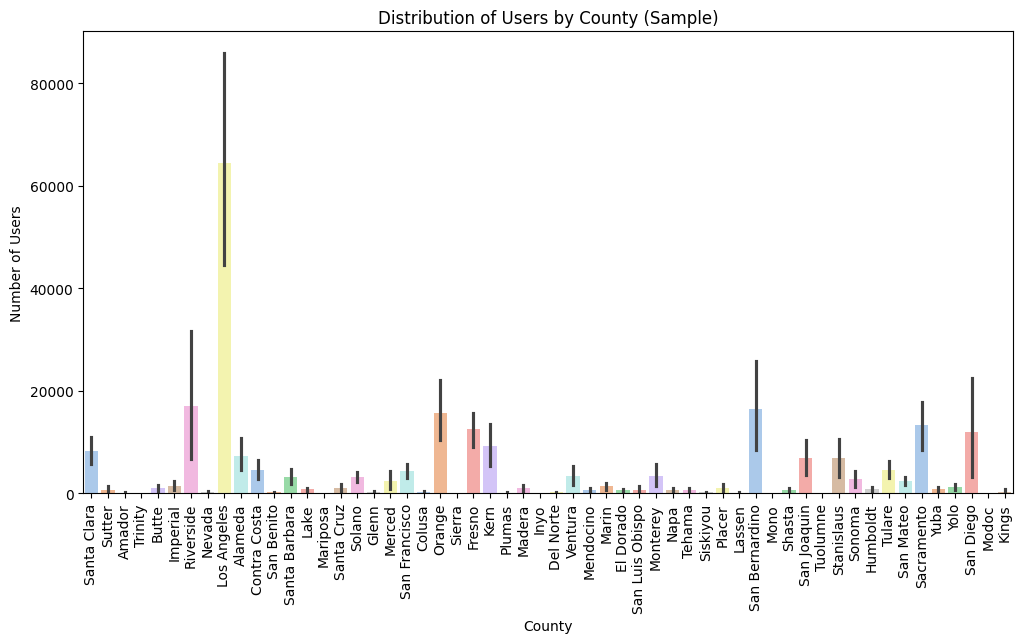

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_path = "dental_caries11.csv"
dental_data = pd.read_csv(file_path)
dental_data = dental_data.drop(columns=['Unnamed: 0'], errors='ignore')
dental_data['Users'] = dental_data['Users'].str.replace(',', '').astype(float)
dental_data['Denominator (3 Months Continuous Eligibility)'] = dental_data['Denominator (3 Months Continuous Eligibility)'].str.replace(',', '').astype(float)
dental_data['Utilization %'] = dental_data['Utilization %'].str.replace('%', '').astype(float)
dental_data = dental_data.dropna()
dental_data_sample = dental_data.sample(n=500, random_state=42)
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Filter', y='Users', data=dental_data_sample, palette='viridis')
plt.title("Number of Users by Age Group (Sample)")
plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Calendar Year', y='Utilization %', data=dental_data_sample, marker='o', ci=None)
plt.title("Utilization Percentage Trend Over Years (Sample)")
plt.xlabel("Year")
plt.ylabel("Utilization (%)")
plt.show()
plt.figure(figsize=(12, 6))
sns.barplot(x='County', y='Users', data=dental_data_sample, palette='pastel')
plt.title("Distribution of Users by County (Sample)")
plt.xlabel("County")
plt.ylabel("Number of Users")
plt.xticks(rotation=90)
plt.show()


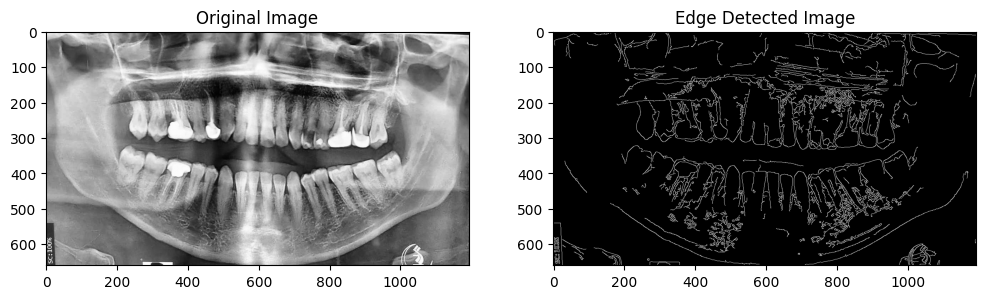

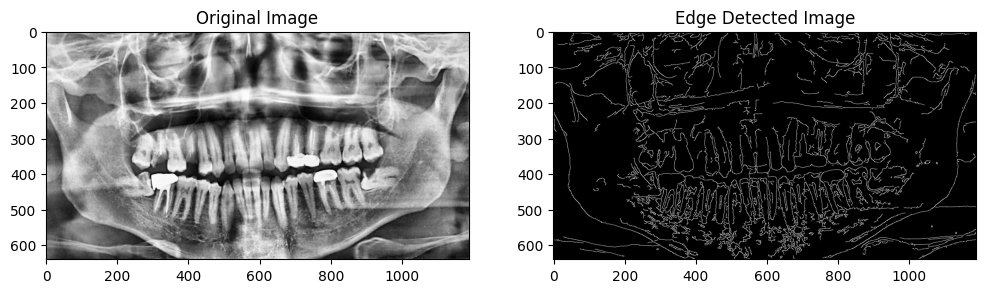

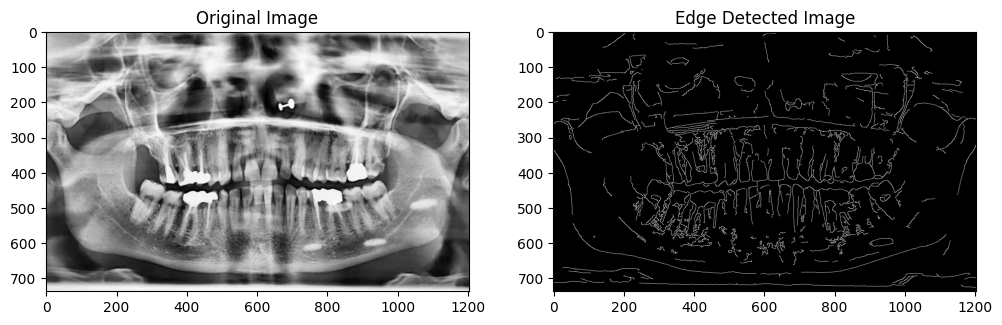

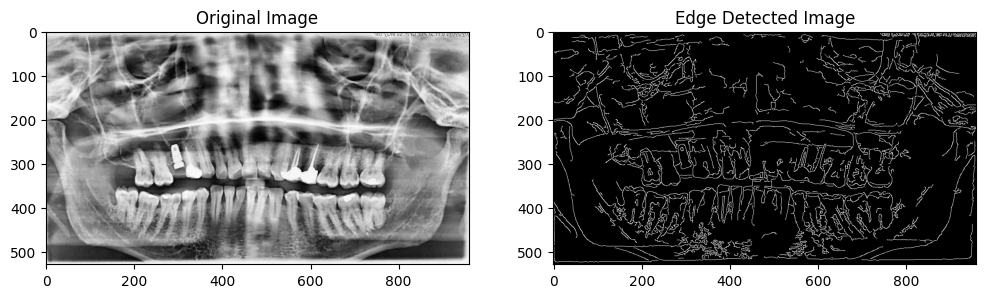

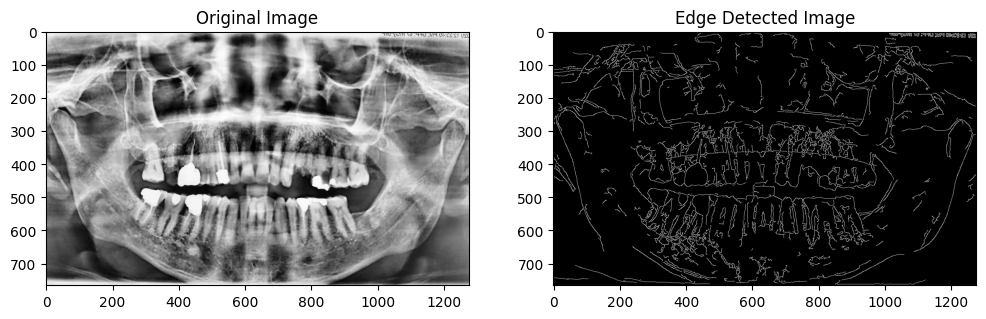

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image_paths = [
    "/content/53.jpg",
    "/content/54.jpg",
    "/content/6.jpg",
    "/content/59.jpg",
    "/content/8.jpg"
]
def process_and_display_images(image_paths):
    for img_path in image_paths:
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        blurred = cv2.GaussianBlur(image, (5, 5), 0)
        edges = cv2.Canny(blurred, 50, 150)
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.title("Original Image")
        plt.imshow(image, cmap='gray')
        plt.subplot(1, 2, 2)
        plt.title("Edge Detected Image")
        plt.imshow(edges, cmap='gray')
        plt.show()
process_and_display_images(image_paths)


In [29]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Mean Squared Error: 0.40017244446028927
R² Score: 0.9978955900440231


In [30]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Mean Squared Error: 0.40017244446028927
R² Score: 0.9978955900440231


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
file_path = "/content/dental_caries11.csv"
data = pd.read_csv(file_path)
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows of the dataset:")
print(data.head())
X = data.drop(columns=["Users"])
y = data["Users"]
X.dropna(inplace=True)
y = y.loc[X.index]
print("\nMissing values after dropping:")
print(X.isnull().sum())
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52200 entries, 0 to 52199
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   County                                         52200 non-null  object
 1   Calendar Year                                  52200 non-null  object
 2   Measure                                        52200 non-null  object
 3   Age Filter                                     52200 non-null  object
 4   Users                                          40533 non-null  object
 5   Denominator (3 Months Continuous Eligibility)  51857 non-null  object
 6   Utilization %                                  40319 non-null  object
dtypes: object(7)
memory usage: 2.8+ MB
None

First 5 rows of the dataset:
    County Calendar Year                                            Measure  \
0  Alameda       CY 2013  Annual Dental Visit (D0